In [1]:
import matplotlib.pyplot as plt
import csv
import numpy as np

In [2]:
parent_folder = '/u/vqezne/Internship/ZNE experiments/Experiment 9/'
workload_name = 'CH4-AS4/'

seeds = [0, 1, 3, 5]
thresholds = [0, 'inf']

vqe_vals_for_diff_thresholds = {}

for th_idx, th_val in enumerate(thresholds):

    # loss values for different seeds for a given threshold
    running_loss = None
    min_length = np.inf

    for seed_idx, seed_val in enumerate(seeds):
        loss_filename = parent_folder + workload_name + '/zne_th_' + str(th_val) + '_seed_' + str(seed_val) + '_losses_.csv'
        
        with open(loss_filename) as f:
            csv_file = csv.reader(f)
            loss_vals_for_seed = []
            
            # get all the loss values for given seed and threshold
            for line in csv_file:
                loss_vals_for_seed.append(float(line[0]))
            
            loss_vals_for_seed = np.array(loss_vals_for_seed)
            
            # add the loss to average out later
            if seed_idx == 0:
                running_loss = loss_vals_for_seed
            else:
                l1 = running_loss.shape[0]
                if len(loss_vals_for_seed) < l1:
                    l1 = len(loss_vals_for_seed)
                
                running_loss = np.add(running_loss[0:l1], np.array(loss_vals_for_seed[0:l1]))
    
    # average out across all seeds
    running_loss = running_loss/len(seeds)
    vqe_vals_for_diff_thresholds[th_val] = running_loss

In [ ]:
for seed_idx, seed_val in enumerate(seeds):
    loss_filename = parent_folder + '/CH4_sto-3g_BK_grnd_AS4_zne_th_' + str(th_val) + '_seed_' + str(seed_val) + '_losses_.csv'
    
    with open(loss_filename) as f:
        csv_file = csv.reader(f)
        loss_vals_for_seed = []
        
        # get all the loss values for given seed and threshold
        for line in csv_file:
            loss_vals_for_seed.append(float(line[0]))

In [ ]:
seed_val = 1
th_val = 200

for seed_idx, seed_val in enumerate(seeds):
    loss_filename = parent_folder + workload_name + '/CH4_sto-3g_BK_grnd_AS4_zne_th_' + str(th_val) + '_seed_' + str(seed_val) + '_losses_.csv'
    
    with open(loss_filename) as f:
        csv_file = csv.reader(f)
        loss_vals_for_seed2 = []
        
        # get all the loss values for given seed and threshold
        for line in csv_file:
            loss_vals_for_seed2.append(float(line[0]))

In [ ]:
loss_vals_for_seed[300:]

[-3.598488621364625,
 -3.309609959255857,
 -3.573325414130084,
 -3.323167864688757,
 -3.5483751711379456,
 -3.5833933487707155,
 -3.5410020159553373,
 -3.484854183960953,
 -3.8338476102769596,
 -3.0920387282465294,
 -3.6243824842463215,
 -3.7566734015061627,
 -3.6876859426997193,
 -3.6122773181479553,
 -3.6900012050125053,
 -3.6660892774386884,
 -3.5821184492434095,
 -3.6589279592798856,
 -3.6916572036896094,
 -3.6055752797939795,
 -3.4005258941562704,
 -3.7982751653614937,
 -3.4804727832804687,
 -3.9125369325590222,
 -3.9853556099278187,
 -3.7084418318087993,
 -3.6457855015379996,
 -4.321658972437923,
 -4.291929286563047,
 -4.750539553885295,
 -4.389977716806878,
 -4.744672400249723,
 -4.461728858414388,
 -4.832839134985488,
 -4.649684732465249,
 -4.888464300868283,
 -4.936341452831603,
 -4.64276543735509,
 -4.898092023121361,
 -4.7919425302022365,
 -4.8592313631630395,
 -4.768816123933685,
 -4.802465246430628,
 -4.9948533432681606,
 -5.144069799373776,
 -4.691365527508831,
 -5.254912

In [ ]:
loss_vals_for_seed2[300:]

[-3.598488621364625,
 -3.309609959255857,
 -3.573325414130084,
 -3.323167864688757,
 -3.5483751711379456,
 -3.5833933487707155,
 -3.5410020159553373,
 -3.484854183960953,
 -3.8338476102769596,
 -3.0920387282465294,
 -3.6243824842463215,
 -3.7566734015061627,
 -3.6876859426997193,
 -3.6122773181479553,
 -3.6900012050125053,
 -3.6660892774386884,
 -3.5821184492434095,
 -3.6589279592798856,
 -3.6916572036896094,
 -3.6055752797939795,
 -3.4005258941562704,
 -3.7982751653614937,
 -3.4804727832804687,
 -3.9125369325590222,
 -3.9853556099278187,
 -3.7084418318087993,
 -3.6457855015379996,
 -4.321658972437923,
 -4.291929286563047,
 -4.750539553885295,
 -4.389977716806878,
 -4.744672400249723,
 -4.461728858414388,
 -4.832839134985488,
 -4.649684732465249,
 -4.888464300868283,
 -4.936341452831603,
 -4.64276543735509,
 -4.898092023121361,
 -4.7919425302022365,
 -4.8592313631630395,
 -4.768816123933685,
 -4.802465246430628,
 -4.9948533432681606,
 -5.144069799373776,
 -4.691365527508831,
 -5.254912

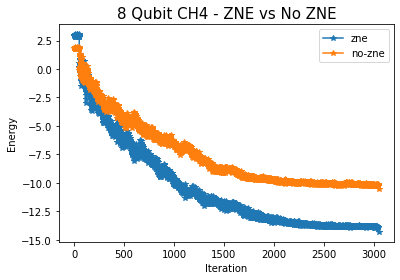

In [50]:
for key in [0, 'inf']:#vqe_vals_for_diff_thresholds:
    if key == 0:
        plt.plot(list(range(len(vqe_vals_for_diff_thresholds[key]))), vqe_vals_for_diff_thresholds[key], marker = '*', label = 'zne')
    else:
        plt.plot(list(range(len(vqe_vals_for_diff_thresholds[key]))), vqe_vals_for_diff_thresholds[key], marker = '*', label = 'no-zne')
plt.title('8 Qubit CH4 - ZNE vs No ZNE', fontsize = 15)
plt.xlabel('Iteration', fontsize = 10)
plt.ylabel('Energy', fontsize = 10)
plt.legend()

In [ ]:
vqe_vals_for_diff_thresholds

{0: array([ 7.16982266,  7.16311516,  7.15190947, ..., -8.91592963,
        -8.91924546, -9.07275037]),
 100: array([ 7.16982266,  7.16311516,  7.15190947, ..., -8.91592963,
        -8.91924546, -9.07275037]),
 200: array([ 7.16982266,  7.16311516,  7.15190947, ..., -8.91592963,
        -8.91924546, -9.07275037]),
 300: array([ 7.16982266,  7.16311516,  7.15190947, ..., -8.91592963,
        -8.91924546, -9.07275037]),
 400: array([ 7.16982266,  7.16311516,  7.15190947, ..., -8.91592963,
        -8.91924546, -9.07275037]),
 500: array([ 7.16982266,  7.16311516,  7.15190947, ..., -8.91592963,
        -8.91924546, -9.07275037]),
 600: array([ 7.16982266,  7.16311516,  7.15190947, ..., -8.91592963,
        -8.91924546, -9.07275037]),
 700: array([ 7.16982266,  7.16311516,  7.15190947, ..., -8.91592963,
        -8.91924546, -9.07275037]),
 800: array([ 7.16982266,  7.16311516,  7.15190947, ..., -8.91592963,
        -8.91924546, -9.07275037]),
 900: array([ 7.16982266,  7.16311516,  7.151909

### Miscellaneous ###
Don't worry about this - this was just the plots to see if normal ZNE+VQE does better than normal VQE

In [38]:
import csv

#bmark = 'H2_6-31g_BK_0.7_AS4'
#bmark = 'CH4_sto-3g_BK_grnd_AS4'
#bmark = 'LiH_sto-3g_BK_1.45_AS4'
#bmark = 'H2O_sto-3g_BK_104_AS4'

all_vals_no_zne = []
filename = '/u/vqezne/Internship/H2O_sto-3g_BK_104_AS4_no_zne_loss.csv'
with open(filename, 'r') as f:
    reader = csv.reader(f)
    for row in reader:
        all_vals_no_zne.append(float(row[0]))

all_vals_with_zne = []
filename = '/u/vqezne/Internship/H2O_sto-3g_BK_104_AS4_with_zne_loss_exponential.csv'
with open(filename, 'r') as f:
    reader = csv.reader(f)
    for row in reader:
        #if abs(float(row[0])) < 100:
        all_vals_with_zne.append(float(row[0]))


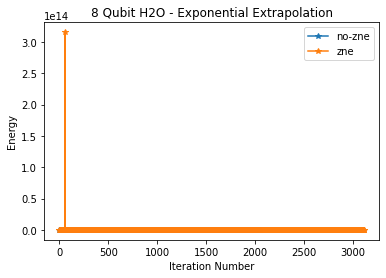

In [39]:
import matplotlib.pyplot as plt

plt.plot(list(range(len(all_vals_no_zne))), all_vals_no_zne, marker = '*', label = 'no-zne')
plt.plot(list(range(len(all_vals_with_zne))), all_vals_with_zne, marker = '*', label = 'zne')
plt.ylabel('Energy')
plt.xlabel('Iteration Number')
plt.title('8 Qubit H2O - Exponential Extrapolation')
plt.legend()

In [ ]:
import csv

#bmark = 'H2_6-31g_BK_0.7_AS4'
#bmark = 'CH4_sto-3g_BK_grnd_AS4'
#bmark = 'LiH_sto-3g_BK_1.45_AS4'
#bmark = 'H2O_sto-3g_BK_104_AS4'
seed = 0

noise_scaling = 8
diff_thresholds = [0, 150, 300, 700, 1200, 1800, 'inf']
vals_at_diff_zne_thresholds = {0:[], 150:[], 300:[], 700:[], 1200:[], 1800:[], 'inf':[]}

parent_folder = '/u/vqezne/Internship/ZNE experiments/Experiment 7/' + str(noise_scaling) + '/LiH-AS4/'

for th_idx, th_val in enumerate(diff_thresholds):
    filename = parent_folder + 'zne_th_' + str(th_val) + '_seed_' + str(seed) + '_losses_.csv'
    with open(filename, 'r') as f:
        reader = csv.reader(f)
        for row in reader:
            vals_at_diff_zne_thresholds[th_val].append(float(row[0]))

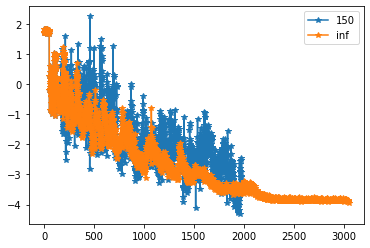

In [ ]:
import matplotlib.pyplot as plt

plt.figure()
for key in vals_at_diff_zne_thresholds:
    if key in [150, 'inf']:
        plt.plot(list(range(len(vals_at_diff_zne_thresholds[key]))), vals_at_diff_zne_thresholds[key], marker = '*', label = str(key))
plt.legend()

### Create Ideal noise plots ###

In [3]:
# Geneeral utility
import numpy as np
from skquant.opt import minimize
from scipy.stats import pearsonr
from numpy.linalg import eigh
import matplotlib.pyplot as plt
import pickle
import copy
import csv

# General qiskit functions
import qiskit
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, Aer, execute, IBMQ, transpile
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit.visualization import plot_histogram
from qiskit.tools import job_monitor
from qiskit.circuit.library import EfficientSU2
from qiskit.algorithms.optimizers import SPSA
from qiskit.quantum_info import Pauli, Operator
from qiskit.providers.models import BackendProperties
from qiskit.providers.fake_provider import FakeMumbai
from qiskit.compiler import transpile
from qiskit_aer.noise import NoiseModel

# Pauli Twirling
from qiskit_research.utils.convenience import add_pauli_twirls

# ZNE
import zne
import mitiq

# Helper functions
from VarSaw.term_grouping import *
import VarSaw.Reconstruction_Functions as RF

<ipython-input-3-1b0d57f2fc29>:18: DeprecationWarning: ``qiskit.algorithms`` has been migrated to an independent package: https://github.com/qiskit-community/qiskit-algorithms. The ``qiskit.algorithms`` import path is deprecated as of qiskit-terra 0.25.0 and will be removed no earlier than 3 months after the release date. Please run ``pip install qiskit_algorithms`` and use ``import qiskit_algorithms`` instead.
  from qiskit.algorithms.optimizers import SPSA


In [4]:
# submit a backend, the factor by which we need to scale its noise
# returns a dictionary with the noise parameters scaled proportionately
def alter_properties_dict(backend, scaling_factor):
    '''
    Args:
    backend: The qiskit backend whose properties dictionary we have to modify
    scaling_factor: The factor by which we want to scale the properties
    
    Returns:
    A new dictionary with scaled noise parameters 
    '''
    import copy
    
    conf_dict = backend.configuration().to_dict()
    prop_dict = backend.properties().to_dict()
    
    new_prop_dict = copy.deepcopy(prop_dict)
    
    #alter the qubit based properties - readout error rates and t1, t2 times
    qubits = prop_dict['qubits']
    props_to_change = ['T1', 'T2', 'readout_error', 'prob_meas0_prep1', 'prob_meas1_prep0']
    for idx, qubit in enumerate(qubits):
        
        #a qubit is represented by 8 properties
        assert len(qubit) == 8
        
        for idx2, prop in enumerate(qubit):
            if prop['name'] in props_to_change:
                
                if prop['name'] == 'T1' or prop['name'] == 'T2':
                    new_prop_value = prop['value']*(1/scaling_factor)
                    #print(prop['name'], prop['value'], new_prop_value)
                else:
                    new_prop_value = prop['value']*scaling_factor
                    #print(prop['name'], prop['value'], new_prop_value)
                
                new_prop_dict['qubits'][idx][idx2]['value'] = new_prop_value
                
    #alter the gate based properties - gate error
    gates = prop_dict['gates']
    for idx, gate in enumerate(gates):
        
        for idx2 in range(len(gate['parameters'])):
            
            #a gate is represented by a dicrionary of 4 items
            gate_error_dict = gate['parameters'][idx2]

            #change the value of the gate error
            if gate_error_dict['name'] == 'gate_error':
                new_gate_error_val = gate_error_dict['value']*scaling_factor
                new_prop_dict['gates'][idx]['parameters'][idx2]['value'] = new_gate_error_val
                #print(gate_error_dict['name'], gate_error_dict['value'], new_gate_error_val)
    
    return new_prop_dict

# Given a counts dict from VQE measurement, give the expectation for the operator
# Assumes the necessary gates were applied to the VQE circuit to convert the 
# measurement from the operator basis to the all-Z basis.
def compute_expectations(all_counts):
    '''
    Args:
    all_counts: All the counts for which we want to compute expectations
    
    Returns:
    All the expectation values
    
    '''
    all_expectation_vals = []
    for idx, count in enumerate(all_counts): 
        sum_counts = sum(list(count.values()))
        exp_val = 0
        for el in count:
            
            # allot the sign to the element
            sign = 1
            if el.count('1')%2 == 1:
                sign = -1
            
            # add to expectation value
            exp_val += sign*(count[el]/sum_counts)
        
        all_expectation_vals.append(exp_val)
            
    return all_expectation_vals

# Given a list of Pauli oeprators and the corresponding coefficients, give the reference energy
def get_ref_energy(coeffs, paulis):
    '''
    Args:
    coeffs: The coeffs of the puali tensor products
    paulis: The pauli tensors
    '''   
    # the final operation
    final_op = None

    for ii, el in enumerate(paulis):
        if ii == 0:
            final_op = coeffs[ii]*Operator(Pauli(el))
        else:
            final_op += coeffs[ii]*Operator(Pauli(el))
   
    # compute the eigenvalues
    evals, evecs = eigh(final_op.data)
   
    # get the minimum eigenvalue
    min_eigenval = np.min(evals)
    return min_eigenval

# Returns the Paulis and Coeffs dictionary for a particular hamiltonian
def give_paulis_and_coeffs(hamiltonian, num_qubits):
    '''
    hamiltonian: A list containing all hamiltonian terms along with their weights
    num_qubits: The number of qubits in the hamiltonian
    '''
    paulis = []
    coeffs = []
    
    for idx, term in enumerate(hamiltonian):
        
        #the coefficient
        coeffs.append(term[0])
        
        #the pauli string
        pauli_string = num_qubits*'I'
        all_gates = term[1]
        #print(non_id_gates)
        
        for _, gate in enumerate(all_gates):
            pauli = gate[0]
            location = int(gate[1])
            #print('location: ', location, 'pauli_string: ', pauli_string, 'pauli: ', pauli)
            pauli_string = pauli_string[0:location] + pauli + pauli_string[location+1:]
            #print(pauli_string, len(pauli_string))
        
        paulis.append(pauli_string)
    
    return coeffs, paulis

# given an initializaed circuit and the parameters, create a quantum_state_preparation circuit
def quantum_state_preparation(circuit, parameters):
    '''
    Args:
    circuit: The input circuit to which we append the parameterized state
    parameters: The parameters of the rotations
    
    Returns:
    Circuit with /home/siddharthdangwal/JigSaw+VQE/Data/Experiment 2/TFIM-4-full/noisy_jigsaw_params.csvthe ansatz for a generalized state appended to it
    '''
    num_qubits = circuit.num_qubits
    
    #the number of repetitions of a general ansatz block
    p = (len(parameters)/(2*num_qubits)) - 1
    print('Value of p is: ', p)
    
    #make sure that p is an integer and then change the format
    assert int(p) == p
    p = int(p)
    
    #create an EfficientSU2 ansatz
    ansatz = EfficientSU2(num_qubits = num_qubits, entanglement = 'full', reps = p, insert_barriers = True)
    ansatz.assign_parameters(parameters = parameters, inplace = True)
    circuit.compose(ansatz, inplace = True)
    
    return circuit

# Prepare a virtual VQE circuit with the given parameters, and the given hamiltonian operator
def vqe_circuit(n_qubits, parameters, hamiltonian):
    '''
    Args:
    n_qubits: The number of qubits in the circuit
    parameters: The parameters for the vqe circuit
    hamiltonian: The hamiltonian string whose expectation would be measured
    using this circuit
    
    Returns:
    The VQE circuit for the given Pauli tensor hamiltonian 
    '''
    qr = QuantumRegister(n_qubits)
    cr = ClassicalRegister(n_qubits)
    circuit = QuantumCircuit(qr, cr)
    
    #append the circuit with the state preparation ansatz
    circuit = quantum_state_preparation(circuit, parameters)
    
    #add the measurement operations
    for i, el in enumerate(hamiltonian):
        if el == 'I':
            #no measurement for identity
            continue
        elif el == 'Z':
            circuit.measure(qr[i], cr[i])
        elif el == 'X':
            circuit.u(np.pi/2, 0, np.pi, qr[i])
            circuit.measure(qr[i], cr[i])
        elif el == 'Y':
            circuit.u(np.pi/2, 0, np.pi/2, qr[i])
            circuit.measure(qr[i], cr[i])
    
    return circuit

# Given 
# 1) a list of digital ZNE scaled ansatz (without measurement operations) which are mapped to the hardware
# 2) A Pauli operator
# 3) The virtual - to - physcial mapping for the scaled ansayz

# Apply the required gates and measurement operations so that we can measure the expectation of the given
# Pauli operator
def apply_operator(all_scaled_ansatz, pauli_op, layout_dict):
    '''
    Args:
    all_scaled_ansatz: A list of ansatz scaled at different noise factors
    pauli_op: The Pauli operator whose expectation we want to obtain
    layout_dict: The mapping from virtual to physical done on the ansatz
    '''
    ansatz_with_measurement = []
    for idx, ansatz in enumerate(all_scaled_ansatz):
        
        # apply all the operations to change basis on the ansatz
        for pauli_idx, pauli in enumerate(pauli_op):
            if pauli == 'I':
                continue
            elif pauli == 'Z':
                ansatz.measure(layout_dict[pauli_idx], pauli_idx)
            elif pauli == 'X':
                ansatz.rz(np.pi/2, layout_dict[pauli_idx])
                ansatz.sx(layout_dict[pauli_idx])
                ansatz.rz(np.pi/2, layout_dict[pauli_idx])
                ansatz.measure(layout_dict[pauli_idx], pauli_idx)
            elif pauli == 'Y':
                ansatz.sx(layout_dict[pauli_idx])
                ansatz.rz(np.pi/2, layout_dict[pauli_idx])
                ansatz.measure(layout_dict[pauli_idx], pauli_idx)
        
        # add this circuit to the list of circuits with measurements
        ansatz_with_measurement.append(ansatz)
    
    return ansatz_with_measurement

# Performs the expectation calculation step for VQE. The flag 'zne_flag' controls whether
# we report a zero-noise-extrapolated value or just a noisy value
def compute_expectations_perfect_simulation(parameters, paulis, backend, scales, nm_scaling_factor, zne_flag = False):
    '''
    Args:
    parameters: The parameters for the VQE ansatz
    paulis: Pauli strings that make up the VQE hamiltonian
    backend: The backend on which the vqe is run
    scales: The different scales at which the noise has to be scaled
    nm_scaling_factor: The scale by which we should scale the noise in the backend
    
    Returns:
    A list of expectations for each circuit
    '''
    
    global scaled_exp_dict_for_diff_iterations
    global iter_num
    
    #the number of qubits
    n_qubits = len(paulis[0])
    
    #get the ansatz
    qr = QuantumRegister(n_qubits)
    cr = ClassicalRegister(n_qubits)
    circuit = QuantumCircuit(qr, cr)
    ansatz = quantum_state_preparation(circuit, parameters)
    
    # transpile the ansatz -- assuming all-to-all connectivity
    backend_basis_gates = backend.configuration().basis_gates
    transpiled_ansatz = transpile(ansatz, basis_gates = backend_basis_gates, optimization_level = 3, seed_transpiler = 0)

    # twirl the ansatz
    # twirled_ansatz  = add_pauli_twirls(transpiled_ansatz, num_twirled_circuits = 10, seed = 0, transpile_added_paulis = True)
    twirled_ansatz = [transpiled_ansatz]
    #for cc in twirled_ansatz:
    #    print('twirled_ansatz: ', type(cc))
    
    # get noise extrapolated versions of the transpiled ansatz
    # add function to record state
    all_scaled_ansatz = {}

    # if the zne flag is true then
    if zne_flag:
        for scale_val in scales:
            #print('Entered here!')
            #scaled_ansatz_for_scale_val = mitiq.zne.scaling.folding.fold_gates_from_left(transpiled_ansatz, scale_val)
            scaled_ansatz_for_scale_val = [mitiq.zne.scaling.folding.fold_all(c, scale_val, exclude = frozenset({"single"})) for c in twirled_ansatz]
            for el in scaled_ansatz_for_scale_val:
                el.save_state()
            all_scaled_ansatz[scale_val] = scaled_ansatz_for_scale_val
    else:
        # if zne flag is false, we just need to run one circuit
        scaled_ansatz_for_scale_val = copy.deepcopy(transpiled_ansatz)
        scaled_ansatz_for_scale_val.save_state()
        all_scaled_ansatz['default'] = scaled_ansatz_for_scale_val
    
    # simulate the ansatz and compute expectations using
    # noisy simulator and ideally to get the expectation
    # value

    scaled_props_dict = alter_properties_dict(backend = backend, scaling_factor = nm_scaling_factor)
    scaled_props = BackendProperties.from_dict(scaled_props_dict)
    noise_model = NoiseModel.from_backend_properties(scaled_props)
    # simulator_statevector = Aer.get_backend('aer_simulator_statevector')
    simulator_dm = Aer.get_backend('aer_simulator_density_matrix', max_parallel_experiments = 0)
    
    # compute expectations and store them
    estimated_expectation_vals = []
    scaled_exps_dict = {}

    if not zne_flag:
        relevant_circuit = all_scaled_ansatz['default']
        job = simulator_dm.run(relevant_circuit, noise_model = noise_model)
        relevant_dm = job.result().data(relevant_circuit)['density_matrix'].data
        for pauli_idx, pauli_op in enumerate(paulis):
            pauli_op_data = Operator(Pauli(pauli_op)).data
            exp_val = np.trace(np.matmul(relevant_dm, pauli_op_data))
            estimated_expectation_vals.append(exp_val.real)
        
        iter_num += 1
        return estimated_expectation_vals
    
    else:
        all_scaled_ansatz_list = []
        for el in all_scaled_ansatz:
            all_scaled_ansatz_list += all_scaled_ansatz[el]
        
        #for el in all_scaled_ansatz_list:
        #    print(type(el))
            
        job = simulator_dm.run(all_scaled_ansatz_list, noise_model = noise_model)
        
        length_per_scale_val = len(all_scaled_ansatz_list)/len(scales)
        assert (int(length_per_scale_val) == length_per_scale_val)
        length_per_scale_val = int(length_per_scale_val)

        for pauli_idx, pauli_op in enumerate(paulis):
            pauli_op_data = Operator(Pauli(pauli_op)).data
            
            # get the different scaled expectation  
            # values for the given Pauli operator
            scaled_exp_vals_for_pauli_op = []
            
            for scale_idx, scale_val in enumerate(scales):
                #relevant_statevector_data = scaled_statevecs_job.result().get_statevector(scale_idx).data
                #exp_val = np.dot(relevant_statevector_data.conjugate(), np.matmul(pauli_op_data, relevant_statevector_data))
                
                relevant_circuits = all_scaled_ansatz[scale_val]
                exp_val = 0
                for cc in relevant_circuits:
                    relevant_dm = job.result().data(cc)['density_matrix'].data
                    exp_val += np.trace(np.matmul(relevant_dm, pauli_op_data))
                exp_val = exp_val/len(relevant_circuits)
                scaled_exp_vals_for_pauli_op.append(exp_val)
            
            #ideal_dm_data = dm_ideal_job.result().data(transpiled_ansatz)['density_matrix'].data
            #ideal_expectation_val = np.trace(np.matmul(ideal_dm_data, pauli_op_data))
            
            #scaled_exps_dict[pauli_op] = [ideal_expectation_val] + scaled_exp_vals_for_pauli_op
            #ideal_expectation_vals.append(ideal_expectation_val)
            
            # if the zne_flag is false, then we use don't compute the estimated value
            # we simply pass the ideal value as the estimated one. If the zne_flag is
            # true, we actually compute the estimated value using Zero Noise Extrapolation
            # all the code below is for the case where zne_flag is True
            
            estimated_expectation_val = scaled_exp_vals_for_pauli_op[0]
            exp_extrapolation_factory = mitiq.zne.inference.ExpFactory(scale_factors = scales)
            lin_extrapolation_factory = mitiq.zne.inference.LinearFactory(scale_factors = scales)
            #ric_extrapolation_factory = RichardsonFactory(scale_factors = scales)
            
            try:
                exp_estimated_expectation_val = exp_extrapolation_factory.extrapolate(scale_factors = scales, exp_values = scaled_exp_vals_for_pauli_op)
                lin_estimated_expectation_val = lin_extrapolation_factory.extrapolate(scale_factors = scales, exp_values = scaled_exp_vals_for_pauli_op)

                if abs(exp_estimated_expectation_val) <= 5*abs(lin_estimated_expectation_val):
                    estimated_expectation_val = exp_estimated_expectation_val
            except:
                pass

            # record the estimated value
            estimated_expectation_vals.append(estimated_expectation_val.real)
    
        # save the scaled expectations dict
        #scaled_exp_dict_for_diff_iterations[iter_num] = scaled_exps_dict
        #print('iter_num before increment in compute expectations function: ', iter_num)
        iter_num += 1
        #print('iter_num after increment in compute expectations function: ', iter_num)
        
        return estimated_expectation_vals, scaled_exp_vals_for_pauli_op[0]

# Given parameters, paulis, and coefficients, the function computes the VQE loss
# Calls the 'compute_expectations_perfect_simulation' function
def compute_loss_perfect_simulation(parameters, coeffs, zne_threshold, **kwargs):
    '''
    Args:
    parameters: The parameters for the VQE ansatz
    paulis: Pauli strings that make up the VQE hamiltonian
    coeffs: Coefficients corresponding to Paulis
    backend: The backend on which the vqe is run
    scales: The different scales at which the noise has to be scaled
    nm_scaling_factor: The scale by which we should scale the noise in the backend
    
    Returns:
    The loss for the entire VQE hamiltonian
    '''
    global iter_num
    
    # if the iteration number crosses a threshold, then start applying ZNE
    if iter_num < zne_threshold:
        expectations = compute_expectations_perfect_simulation(parameters, **kwargs)
    else:
        expectations = compute_expectations_perfect_simulation(parameters, zne_flag = True, **kwargs)
    
    loss = 0
    
    for i, el in enumerate(expectations):
        loss += coeffs[i]*el
    
    return loss

# Computes the loss, and saves it in the given files. Calls the 'compute_loss_perfect_simulation' function internally
def vqe_perfect_simulation(parameters, loss_filename = None, params_filename = None, **kwargs):
    '''
    Args:
    parameters: The parameters of the VQE ansatz
    paulis: The paulis tensor hamiltonians
    coeffs: The coefficients corresponding to each pauli tensor
    backend: The backend on which the vqe is run
    mode: Specifies if we have to run a noisy simulation or ideal simulation or run the circuit on a device
    shots: The number of shots for which each circuit is executed
    
    Returns:
    Loss for one iteration of the VQE
    '''

    #number of qubits in the VQE ansatz
    paulis = kwargs['paulis']
    n_qubits = len(paulis[0])
    
    #making sure that the number of elements in each pauli tensor is the same
    for i in paulis:
        assert len(i) == n_qubits
    
    loss =  compute_loss_perfect_simulation(parameters, **kwargs)
    print('Loss computed by VQE is: {}'.format(loss))
    
    # save the loss and parameters
    if not (loss_filename == None):
        with open(loss_filename, 'a') as file:
            writer = csv.writer(file)
            writer.writerow([loss])
    
    if not(params_filename == None):
        with open(params_filename, 'a') as file:
            writer = csv.writer(file)
            writer.writerow(parameters)

    return loss

In [5]:
# first argument is the molecule test file
molecule_string = 'LiH_sto-3g_BK_1.45_AS4' # write molecule name here
#bmark = 'H2_6-31g_BK_0.7_AS4'
#bmark = 'CH4_sto-3g_BK_grnd_AS4'
#bmark = 'LiH_sto-3g_BK_1.45_AS4'
#bmark = 'H2O_sto-3g_BK_104_AS4'


hamiltonian_string = '/u/vqezne/Internship/VarSaw/vqe-term-grouping-master/hamiltonians/' + molecule_string + '.txt'
hamiltonian_string_elements = hamiltonian_string.split('/')
hamil = parseHamiltonian(hamiltonian_string)

#get the number of qubits in the hamiltonian
max_length = 0
for i in hamil:
    if int(i[1][-1][1]) + 1 > max_length:
        max_length = int(i[1][-1][1]) + 1

#Number of qubits in the hamiltonian
n_qubits = max_length

# number of repetitions
p = 1

#get paulis and coefficients
coeffs, paulis = give_paulis_and_coeffs(hamil, n_qubits)
n_terms = len(paulis)
paulis = paulis[1:n_terms]
coeffs = coeffs[1:n_terms]

# set the computation seed
seed = 0
qiskit.utils.algorithm_globals.random_seed = int(seed)

In [6]:
get_ref_energy(coeffs, paulis)

-9.302407969324555

In [7]:
backend = FakeMumbai()
kwargs = {
    'paulis': paulis,
    'scales': [1, 3, 5],
    'nm_scaling_factor': 8,
    'backend': backend,
}